In [49]:
import pickle

import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [50]:
# " LOAD DATA BASE"
dataset = 'ResponseChatBot.xlsx'
knowledge_base = pd.read_excel(dataset)
knowledge_base.sample(n=20).head(20)

,request,response
129,"capito, chau",no entiendo la pregunta
154,hasta pronto!!,Vuelve pronto
135,"chau, hablamos",Vuelve pronto
37,¿cómo funciona?,Solo debes decirme que necesitas
74,gracias,ten buen dia
148,gracias sofi,Vuelve pronto
80,Holita,Hola soy bot tu asistente virtual
33,¿quién eres?,Hola soy bot tu asistente virtual
176,"no me sirve, cancela mi peticion",Ten un buen día
62,Cuenteme,Te comunico con un asesor


In [51]:
knowledge_base["response"].unique()

array(['hola', 'buenas', 'buenas  tardes', 'buenas noches', 'Buenos dias',
       'adiós ', 'ten buen día', 'bien y tu', 'estuvo bien y el tuyo ',
       'bye', 'Hola soy bot tu asistente virtual', 'Te leo',
       'Hola soy bot ', 'Solo debes decirme que necesitas',
       'me alegro  ¿cuentame que necesitas?', '¿En que te ayudo?',
       'Te comunico con un asesor', 'bien ytu', 'bieny tu',
       'ten buen dia', 'Vuelve pronto', 'Bien y tu',
       'no entiendo la pregunta', 'Ten un buen día'], dtype=object)

In [52]:
len(knowledge_base)

205

In [53]:
# label encode the target variable to transform non-numerical labels
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(knowledge_base["response"])  # numerical labels
y

array([18, 18, 13, 14, 15,  1, 18, 18, 18, 18,  9,  9, 22, 10, 10, 17, 10,
       10, 16,  3,  6,  2,  4, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,  3,
        6,  2, 10,  4,  3,  6,  2, 10,  4, 23,  5,  3, 10, 10, 11,  3,  3,
       12, 10, 10, 10, 19, 19, 19, 10,  5,  5,  5,  5, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 21, 21, 21, 21, 21, 19, 19, 19,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  8,  8,  8, 19,  3,  3,  3,  0,
        3,  0,  0,  0,  3,  3,  3, 20,  0,  0,  0,  0,  3,  3,  3,  7,  8,
        7,  8,  7,  8,  7,  8,  7,  8,  7,  8, 20,  8,  8,  8,  8,  8,  8,
       20,  8, 20,  8,  8,  8,  8,  7,  8,  8,  7,  7,  8,  7,  8,  8,  7,
        7,  8,  7,  8,  7,  8,  8,  8,  7,  8, 20,  8,  7,  8, 20,  8,  8,
        7,  8,  7,  8,  8,  7,  7,  8,  7,  8,  7,  8,  8,  8,  8, 20,  8,
       20, 20,  8,  8, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20])

In [54]:
intent_names = encoder.classes_
intent_names

array(['Bien y tu', 'Buenos dias', 'Hola soy bot ',
       'Hola soy bot tu asistente virtual',
       'Solo debes decirme que necesitas', 'Te comunico con un asesor',
       'Te leo', 'Ten un buen día', 'Vuelve pronto', 'adiós ',
       'bien y tu', 'bien ytu', 'bieny tu', 'buenas', 'buenas  tardes',
       'buenas noches', 'bye', 'estuvo bien y el tuyo ', 'hola',
       'me alegro  ¿cuentame que necesitas?', 'no entiendo la pregunta',
       'ten buen dia', 'ten buen día', '¿En que te ayudo?'], dtype=object)

In [55]:
x = knowledge_base["request"]
x

0               hola
1                 hi
2             buenas
3      buenas tardes
4      buenas noches
           ...      
200               no
201               ah
202         como asi
203         como asi
204         como asi
Name: request, Length: 205, dtype: object

In [57]:
from sklearn.model_selection import train_test_split
# Hold-out Partition
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=0)

# PROCESAMIENTO

## ....

In [58]:
" TF-IDF score represents the relative importance of a term in the document and the entire corpus. "
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
x_train_tfidf = tfidf_vect.transform(X_train)
x_train_tfidf

<153x129 sparse matrix of type '<class 'numpy.float64'>'
	with 329 stored elements in Compressed Sparse Row format>

In [59]:
tfidf_vect.get_feature_names_out()

array(['adios', 'ah', 'altura', 'amable', 'asi', 'ayuda', 'bien',
       'biencito', 'bot', 'botsito', 'buenas', 'bueno', 'bye', 'cancela',
       'cancelar', 'chao', 'chaolin', 'chau', 'color', 'como', 'con',
       'conversación', 'cuentame', 'cuenteme', 'cómo', 'dale', 'de',
       'debo', 'deseo', 'dia', 'dias', 'dime', 'dsd', 'día', 'el', 'en',
       'encuentro', 'entendido', 'entendí', 'eres', 'esta', 'estado',
       'estas', 'este', 'esto', 'estoy', 'estubo', 'estuvo', 'estás',
       'estés', 'ey', 'favorito', 'fdfgghfdgfdgdg', 'feliz', 'funciona',
       'gracias', 'hablamos', 'hablar', 'haces', 'has', 'hasta', 'hello',
       'helo', 'hi', 'hola', 'hubo', 'igual', 'info', 'irme', 'jelo',
       'la', 'llamas', 'lo', 'luego', 'me', 'mi', 'muchas', 'muy', 'nada',
       'necesito', 'no', 'noches', 'nos', 'ok', 'oka', 'oki', 'ola',
       'olita', 'perfecto', 'peticion', 'por', 'proceso', 'que', 'quien',
       'quiero', 'quién', 'qué', 'regresé', 'robotina', 'salir',
       '

In [60]:
" MODEL TRAINING AND DEVELOPMENT"
nfolds = 5
tuned_parameters = {'C': [0.001, 0.10, 0.1, 10, 100, 1000]}
lr_model = GridSearchCV(LogisticRegression(), tuned_parameters, cv=nfolds,  scoring='accuracy') 
lr_model.fit(x_train_tfidf, y_train)

/home/esneider/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/esneider/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/esneider/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 0.1, 10, 100, 1000]},
             scoring='accuracy')

In [61]:
means = lr_model.cv_results_['mean_test_score']
stds = lr_model.cv_results_['std_test_score']
parameters = lr_model.cv_results_['params']
results = pd.concat((pd.DataFrame.from_dict(parameters), pd.DataFrame(means, columns=['Mean']), pd.DataFrame(stds, columns=['STD'])), axis=1)
results

,C,Mean,STD
0,0.001,0.209247,0.016928
1,0.100,0.209247,0.016928
2,0.100,0.209247,0.016928
3,10.000,0.490538,0.052784
4,100.000,0.496559,0.067296
5,1000.000,0.483656,0.054998


In [62]:
best_c = lr_model.cv_results_['params'][lr_model.best_index_]['C']
best_c

100

In [63]:
# TEST & METRICS & ERROR ANALYSIS

best_lr_model = LogisticRegression(C=best_c).fit(x_train_tfidf, y_train)

/home/esneider/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
X_test.head()

52                        Quihubo
181    salgo de esta conversación
5                     buenos dias
18                            bye
188                 cancelar todo
Name: request, dtype: object

In [65]:
# PROCESAMIENTO DEL CONJUNTO DE TEST

In [66]:
x_test_tfidf = tfidf_vect.transform(X_test)
x_test_tfidf

<52x129 sparse matrix of type '<class 'numpy.float64'>'
	with 89 stored elements in Compressed Sparse Row format>

In [69]:
y_pred = best_lr_model.predict(x_test_tfidf)

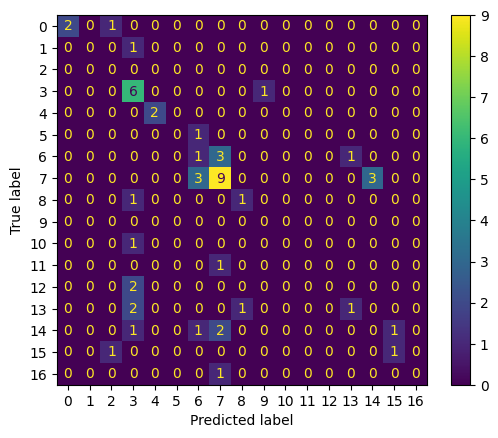

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.43      0.86      0.57         7
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           7       0.17      0.20      0.18         5
           8       0.56      0.60      0.58        15
          10       0.50      0.50      0.50         2
          12       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.50      0.25      0.33         4
          20       0.00      0.00      0.00         5
          21       0.50      0.50      0.50         2
          22       0.00      0.00      0.00         1

    accuracy              

/home/esneider/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/esneider/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/esneider/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/esneider/.local/lib/python3.8/site-p

In [72]:
# TRAIN MODEL WITH ALL DATA FOR PRODUCTION
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(x)
x_tfidf = tfidf_vect.transform(x)

pdn_lr_model = LogisticRegression(C=best_c).fit(x_tfidf, y)

/home/esneider/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
pdn_lr_model

LogisticRegression(C=100)

In [74]:
# "SAVE FINAL MODEL"
pickle.dump(pdn_lr_model, open('model_chatbot.pkl', 'wb'))
pickle.dump(tfidf_vect, open('chatbot_vocabulary.pkl', 'wb'))
pickle.dump(intent_names, open('response_chatbot.pkl', 'wb'))